## Plot 0D Reactor Data

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from numpy import diff

import cantera as ct

In [321]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_10Cases/'

CasesVec   = [1]#[0,2,4,6,8]
DirDir     = OutputDir 

NVarsRed   = 5

InputVars  = []
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))
InputVars

['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']

In [322]:
ICsVec = pd.read_csv(OutputDir+'/Orig/train/ext/ICs.csv').to_numpy()
P0sVec       = ICsVec[:,0]
EqRatio0sVec = ICsVec[:,1]
T0sVec       = ICsVec[:,2]

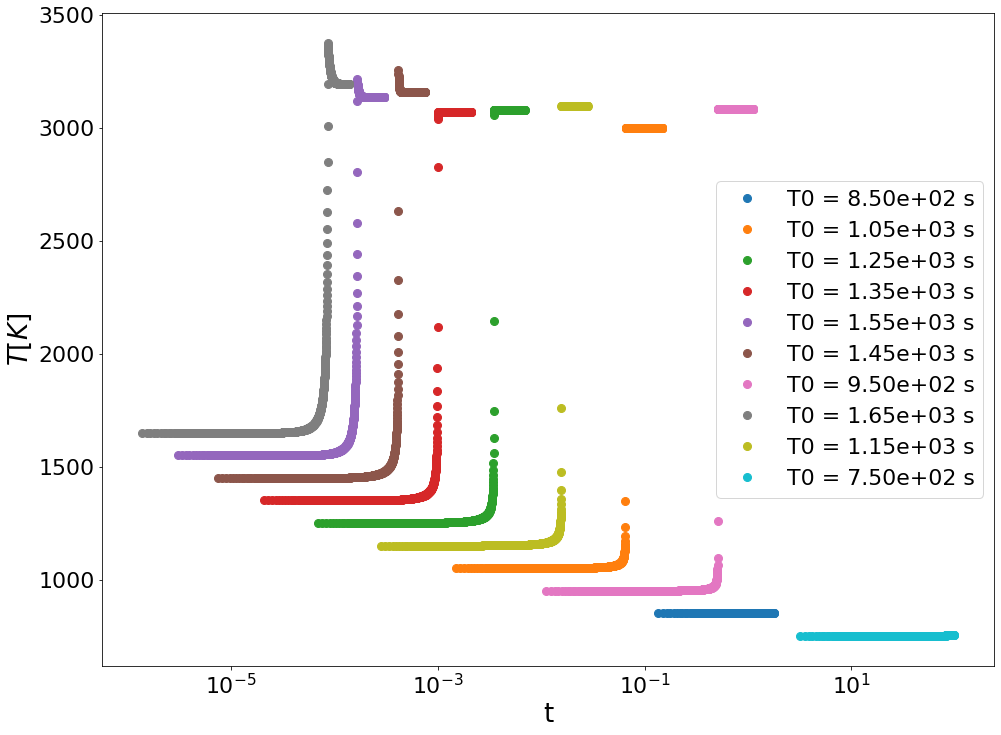

In [323]:
fig  = plt.figure(figsize=(16,12))
for i in range(10):#len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1['t'], Data1['T'], 'o', label='T0 = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$T [K]$')
    plt.legend()
    plt.xscale('log')

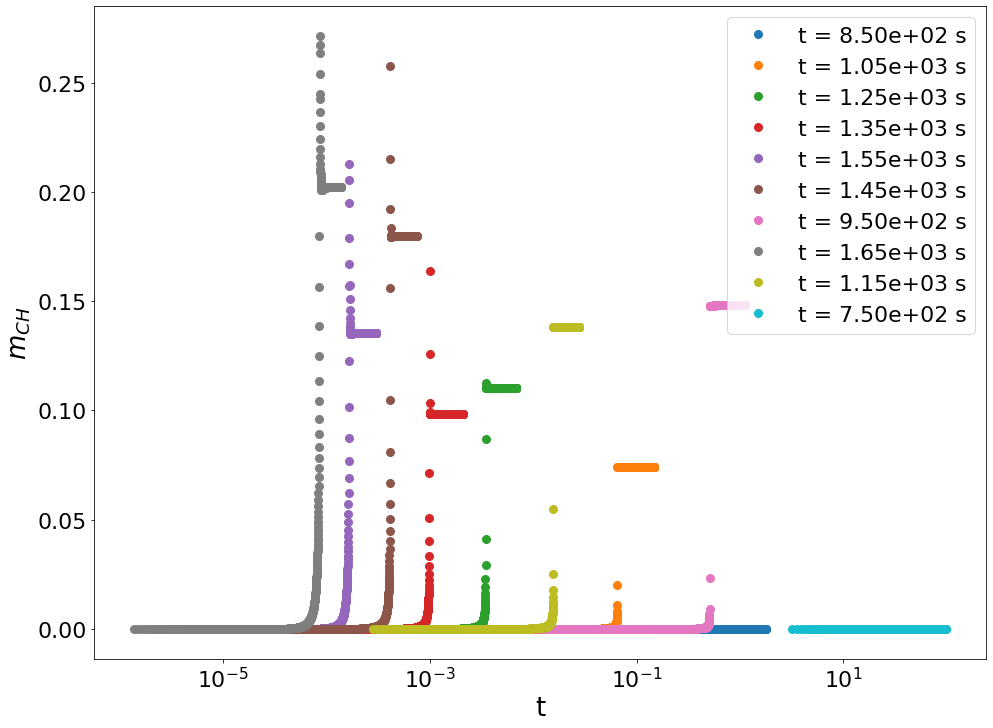

In [324]:
fig  = plt.figure(figsize=(16,12))
for i in range(10):#0):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1.t, Data1.CO, 'o', label='t = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$m_{CH}$')
    plt.legend()
    plt.xscale('log')

y0_pca =  [-35.41882993  -0.14077757  -0.1129801    0.10923441  -0.06795468]


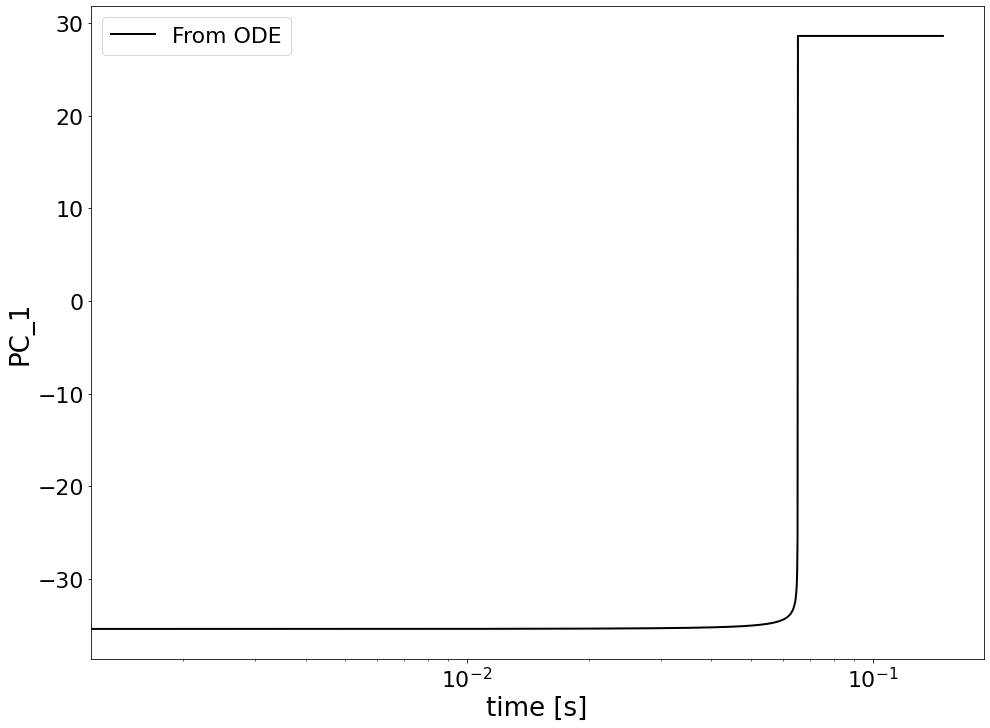

In [326]:
### Evaluating on Test Data

iPC    = 0

fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:

    FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    y0_pca                       = yMat_pca[0,:]
    print('y0_pca = ', y0_pca)
    
    plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('PC_'+str(iPC+1))
plt.legend()

In [327]:
FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

In [328]:
yMat_    = (yMat_pca.dot(A))*D[:,0] + C[:,0]

iVar =  16


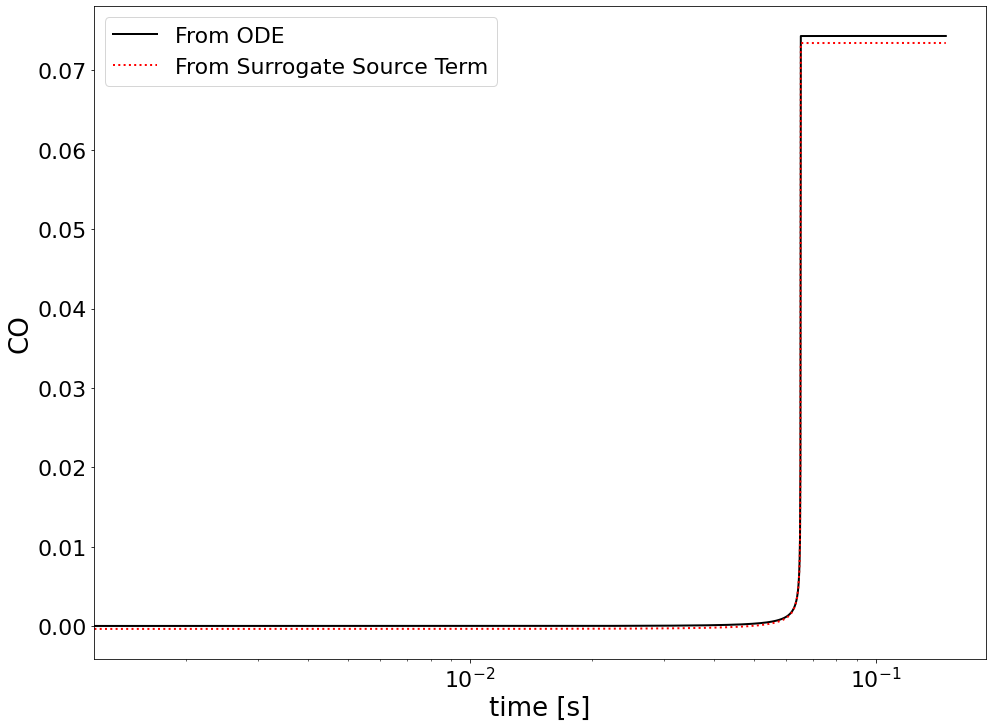

In [338]:
FileName = DirDir +'/Orig/train/ext/y.csv.1'
Data     = pd.read_csv(FileName, header=0)
VarNames = list(Data.columns)

VarOI    = 'CO'
for iVar in range(1,len(VarNames)):
    if (VarNames[iVar] == VarOI):
        print('iVar = ', iVar)
        break
        
fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:

    FileName     = DirDir +'/Orig/train/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    yMat         = Data.to_numpy()[:,1:]
        
    plt.plot(tVec, yMat[:,iVar-1],  '-k', label='From ODE',                   lw=2)
    plt.plot(tVec, yMat_[:,iVar-1], ':r', label='From Surrogate Source Term', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel(VarOI)
plt.legend()